In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Skyserver.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [5]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [6]:
df.rename(columns={'class':'class_id'},inplace=True)

In [7]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class_id', 'redshift', 'plate', 'mjd',
       'fiberid'],
      dtype='object')

In [8]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class_id      object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [9]:
def class_id(x):
    if x=='STAR':
        return 2
    if x=='GALAXY':
        return 1
    if x=='QSO':
        return 0

In [10]:
df['class_id']=df['class_id'].apply(class_id)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class_id,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,1,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,1,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,1,0.014019,447,51877,229


In [11]:
df.shape

(10000, 18)

In [12]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class_id     0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

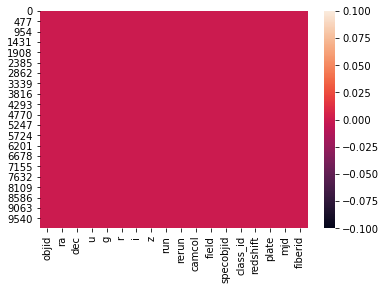

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class_id   10000 non-null  int64  
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


In [15]:
df=df.drop('rerun',axis=1)

In [16]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class_id,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,1.330200,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,1.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


In [17]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class_id,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,1.921887e-15,5.938881e-16,-1.829075e-15,-1.442555e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.118918e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,1.146139e-01,-1.314714e-01,8.834533e-02,-9.124866e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,9.944672e-03,8.547880e-03,-1.294293e-01,-2.845415e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,1.022304e-02,1.465110e-02,-5.497908e-02,-3.573522e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,1.074725e-02,1.713294e-02,1.978831e-02,-2.786783e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,1.346079e-02,1.978147e-02,7.295994e-02,-2.053670e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,1.092981e-02,1.824845e-02,1.123981e-01,-1.494443e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,1.518143e-01,-4.638975e-01,9.360436e-02,-1.006273e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
camcol,1.921887e-15,-6.293831e-03,1.146139e-01,9.944672e-03,1.022304e-02,1.074725e-02,1.346079e-02,1.092981e-02,1.518143e-01,1.000000e+00,-6.792055e-02,4.080943e-02,-1.026907e-02,6.833537e-03,4.079461e-02,2.628396e-02,5.356292e-01


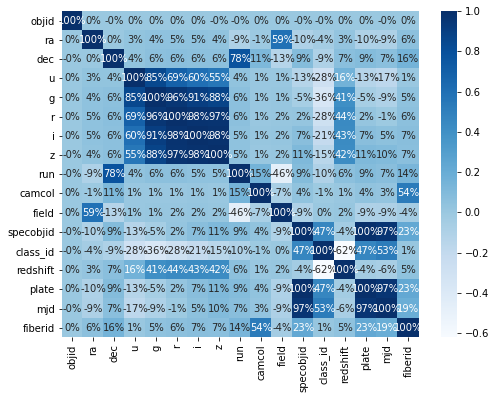

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='Blues')
plt.show()

In [19]:
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class_id    -0.381391
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [20]:
from scipy import stats
p_value=stats.shapiro(df['field'].dropna())[1]
if p_value >= 0.05:
    print('null hyp of normality is rejected')
else:
    print('null hyp of normality is accepted')

null hyp of normality is accepted


In [21]:
x=df.iloc[:,0:-1]
x.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class_id,redshift,plate,mjd
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,1,0.123111,287,52023
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922


In [22]:
y=df.iloc[:,-1]
y.head()

0    491
1    541
2    513
3    510
4    512
Name: fiberid, dtype: int64

In [23]:
x.shape

(10000, 16)

In [24]:
y.shape

(10000,)

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [26]:
x_train.shape

(6700, 16)

In [27]:
y_train.shape

(6700,)

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.coef_

array([ 0.00000000e+00, -1.00713466e-33,  2.50578450e-35, -1.21624132e-36,
       -6.50970185e-37,  1.85489048e-37,  8.88270045e-37,  1.51543111e-36,
        2.67427296e-34,  8.14927332e-37, -1.58779417e-34,  2.32198443e-17,
        3.40392540e-36, -2.16555074e-37,  2.06232327e-32,  1.68663098e-32])

In [31]:
lr.intercept_

313.21216453341475

In [32]:
lr.score(x_train,y_train)

0.05153582309587901

In [33]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class_id', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [34]:
class_id=lr.predict(x_test)
print('Predicted class id:',class_id)
print('actual class id',y_test)

Predicted class id: [324.95390576 498.57246673 320.37718156 ... 322.31401844 322.39087612
 328.82314452]
actual class id 6252    538
4684    776
1731    277
4742    283
4521    323
       ... 
1744    309
9754    555
6094    628
8781    382
9401    546
Name: fiberid, Length: 3300, dtype: int64


In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,class_id))

print('Mean squared error:',mean_squared_error(y_test,class_id))


error:
Mean absolute error: 170.26395218528484
Mean squared error: 40402.51641230758


In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test,class_id))

0.0549039597881551


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.034358250779820264

In [38]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [39]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.05153582309587901
Error:
Mean absolute error: 170.26395218528484
Mean squared error: 40402.51641230758
r2_score: 0.0549039597881551
***************************************************************


Score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 66.47393939393939
Mean squared error: 15176.46606060606
r2_score: 0.6449919645619164
***************************************************************


Score of KNeighborsRegressor() is: 0.8916681069675401
Error:
Mean absolute error: 33.047696969696965
Mean squared error: 7156.4697090909085
r2_score: 0.8325957939120473
***************************************************************


Score of SVR() is: 0.07518562880896995
Error:
Mean absolute error: 167.70340791801056
Mean squared error: 39302.82112344907
r2_score: 0.08062804222731734
***************************************************************


Score of Lasso() is: 0.3522230654694628
Error:
Mean absolute error: 128.40413623210674
Mean s

In [40]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001, 'random_state': 42}

In [41]:
ridge=Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrd)) 
print('Mean squared error:',mean_squared_error(y_test,predrd))
print('\n')
print('r2_score:',r2_score(y_test,predrd))

Score: 0.9946111565431537


Mean absolute error: 11.737148573525896
Mean squared error: 232.11457737481567


r2_score: 0.994570373644213


In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.9602898620162122


Mean absolute error: 68.245
Mean squared error: 10296.51746060606


r2_score: 0.7591437676632797


In [43]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.34834891659186307


Mean absolute error: 129.98907929469573
Mean squared error: 27173.67221186716


r2_score: 0.3643532065337638


In [44]:
import joblib
joblib.dump(ridge,'Skyserver.csv')

['Skyserver.csv']